<a href="https://colab.research.google.com/github/isaacmikhail/TelecomX_challenge_Alura/blob/main/TelecomX_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
DataFrame=pd.read_json(url)
DataFrame

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
# Normaliza cada coluna aninhada
account_df = pd.json_normalize(DataFrame['account'])
internet_df = pd.json_normalize(DataFrame['internet'])
phone_df = pd.json_normalize(DataFrame['phone'])
customer_df = pd.json_normalize(DataFrame['customer'])

# Junta tudo com as colunas simples
base_df = pd.concat([DataFrame[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


In [8]:
base_df['PerfilCliente'] = base_df.apply(
    lambda row: (
        'Internet e Telefone' if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No'
        else 'Só Internet' if row['PhoneService'] == 'No' and row['InternetService'] != 'No'
        else 'Só Telefone' if row['PhoneService'] == 'Yes' and row['InternetService'] == 'No'
        else 'Sem serviço'
    ),
    axis=1
)

In [9]:
base_df['PerfilCliente'].value_counts()

,count
PerfilCliente,
Internet e Telefone,4979
Só Telefone,1581
Só Internet,707


In [10]:
for col in base_df.select_dtypes(include='object').columns:
    base_df[col] = base_df[col].str.strip()

In [11]:
for col in base_df.select_dtypes(include='object').columns:
    base_df[col] = base_df[col].str.lower()

In [12]:
for col in base_df.select_dtypes(include='object').columns:
    print(f"{col}: {base_df[col].unique()}")

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes' '']
gender: ['female' 'male']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
PhoneService: ['yes' 'no']
MultipleLines: ['no' 'yes' 'no phone service']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['yes' 'no' 'no internet service']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']
Contract: ['one year' 'month-to-month' 'two year']
PaperlessBilling: ['yes' 'no']
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
PerfilCliente: ['internet e telefone' 'só internet' 'só telefone']


In [13]:
# Apenas clientes com ambos os serviços
clientes_completos = base_df[base_df['PerfilCliente'] == 'Internet e Telefone']

# Apenas clientes com internet
clientes_internet = base_df[base_df['PerfilCliente'] == 'Só Internet']

In [14]:
base_df['Charges.Total'].apply(lambda x: isinstance(x, str)).sum()

np.int64(7267)

In [15]:
customer_df.isnull().sum()
internet_df.isnull().sum()
phone_df.isnull().sum()
account_df.isnull().sum()


,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0


In [16]:
phone_df = phone_df[phone_df['PhoneService'] == 'Yes']


In [17]:
internet_df = internet_df[internet_df['InternetService'] != 'No']


In [18]:
phone_df = phone_df[phone_df['MultipleLines'] != 'No phone service']


In [19]:
base_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.3,internet e telefone
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.4,internet e telefone
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,internet e telefone
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,internet e telefone
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.4,internet e telefone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.9,internet e telefone
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.7,internet e telefone
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,internet e telefone
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,internet e telefone


In [20]:
base_df.duplicated().sum()


np.int64(0)

In [24]:
base_df.dtypes

,0
customerID,object
Churn,bool
gender,object
SeniorCitizen,bool
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,bool
InternetService,object


In [22]:
bool_cols=['SeniorCitizen']
for col in bool_cols:
  base_df[col]=base_df[col].map({1:True, 0:False})

base_df[col] = base_df[col].astype(bool)



#base_df[col] = base_df[col].astype(bool)

In [23]:
bool_cols=['Churn','MultipleLines','DeviceProtection','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','PaperlessBilling','StreamingMovies']

for col in bool_cols:
    base_df[col] = base_df[col].map({'yes': True, 'no': False}).astype(bool)



In [25]:
base_df['Charges.Total'] = pd.to_numeric(base_df['Charges.Total'], errors='coerce')

In [26]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [27]:
base_df[(base_df['PhoneService'] == False) & (base_df['MultipleLines'] != 'No')]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente


In [28]:
base_df['customerID'].duplicated().sum()

np.int64(0)

<Axes: xlabel='Charges.Total', ylabel='Count'>

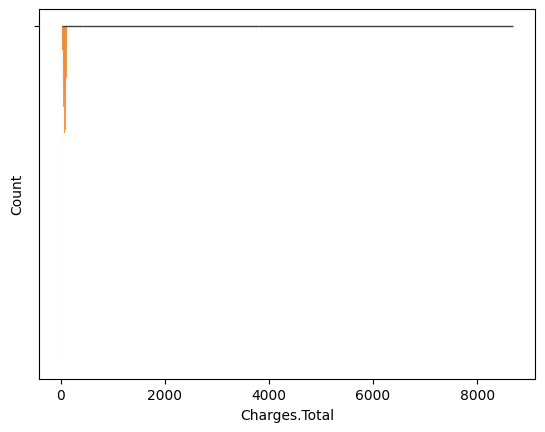

In [ ]:
sns.boxplot(x=base_df['Charges.Total'])  # Outliers
sns.histplot(base_df['Charges.Monthly'], bins=30)  # Distribuição

In [29]:
base_df['SeniorCitizen'].value_counts(normalize=True)

,proportion
SeniorCitizen,
False,0.837347
True,0.162653


In [30]:
#valor diário por tempo de contrato

base_df['conta_diaria']=base_df['Charges.Monthly']/30
base_df['conta_diaria']

,conta_diaria
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [31]:
#validação
#análise descritiva
base_df[['Charges.Monthly', 'conta_diaria']].describe()

,Charges.Monthly,conta_diaria
count,7267.000000,7267.000000
mean,64.720098,2.157337
std,30.129572,1.004319
min,18.250000,0.608333
25%,35.425000,1.180833
50%,70.300000,2.343333
75%,89.875000,2.995833
max,118.750000,3.958333


In [32]:
#valor diário em relação ao tempo
base_df['total_pago']=base_df['conta_diaria']*base_df['tenure']*30
base_df['total_pago']

,total_pago
0,590.40
1,539.10
2,295.60
3,1274.00
4,251.70
...,...
7262,716.95
7263,1872.20
7264,100.60
7265,4545.95


In [33]:
base_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente,conta_diaria,total_pago
0,0002-orfbo,False,female,False,yes,yes,9,yes,False,dsl,...,True,False,one year,True,mailed check,65.60,593.30,internet e telefone,2.186667,590.40
1,0003-mknfe,False,male,False,no,no,9,yes,True,dsl,...,False,True,month-to-month,False,mailed check,59.90,542.40,internet e telefone,1.996667,539.10
2,0004-tlhlj,True,male,False,no,no,4,yes,False,fiber optic,...,False,False,month-to-month,True,electronic check,73.90,280.85,internet e telefone,2.463333,295.60
3,0011-igkff,True,male,True,yes,no,13,yes,False,fiber optic,...,True,True,month-to-month,True,electronic check,98.00,1237.85,internet e telefone,3.266667,1274.00
4,0013-exchz,True,female,True,yes,no,3,yes,False,fiber optic,...,True,False,month-to-month,True,mailed check,83.90,267.40,internet e telefone,2.796667,251.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,False,female,False,no,no,13,yes,False,dsl,...,False,False,one year,False,mailed check,55.15,742.90,internet e telefone,1.838333,716.95
7263,9992-rramn,True,male,False,yes,no,22,yes,True,fiber optic,...,False,True,month-to-month,True,electronic check,85.10,1873.70,internet e telefone,2.836667,1872.20
7264,9992-ujoel,False,male,False,no,no,2,yes,False,dsl,...,False,False,month-to-month,True,mailed check,50.30,92.75,internet e telefone,1.676667,100.60
7265,9993-lhieb,False,male,False,yes,yes,67,yes,False,dsl,...,False,True,two year,False,mailed check,67.85,4627.65,internet e telefone,2.261667,4545.95


In [34]:
#distribuição da evasão
base_df['Churn'].value_counts()
base_df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
False,71.198569
True,28.801431
